# Early Disease Detection

### 1. Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

### 2. Reading from the file and getting information

In [2]:
df=pd.read_csv('edd_final.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease_type
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,Borderline Hypertension
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,Cardiovascular Disease
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,Cardiovascular Disease
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,Cardiovascular Disease
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,Healthy / Low Risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          70000 non-null  object 
 1   country       70000 non-null  object 
 2   id            70000 non-null  int64  
 3   active        70000 non-null  int64  
 4   age           70000 non-null  int64  
 5   alco          70000 non-null  int64  
 6   ap_hi         70000 non-null  int64  
 7   ap_lo         70000 non-null  int64  
 8   cholesterol   70000 non-null  int64  
 9   gender        70000 non-null  int64  
 10  gluc          70000 non-null  int64  
 11  height        70000 non-null  int64  
 12  occupation    70000 non-null  object 
 13  smoke         70000 non-null  int64  
 14  weight        70000 non-null  float64
 15  disease_type  70000 non-null  object 
dtypes: float64(1), int64(11), object(4)
memory usage: 8.5+ MB


In [4]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000


### 3. Data Preprocessing

In [7]:
#Checking for Null values
df.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

In [50]:
#Encode categorical variables
label_encoders = {}
for column in ['country','occupation','disease_type']:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Assuming 'age' values are in days, divide by 365.25 for a more accurate conversion
df['age'] = (df['age'] / 365.25).round().astype(int)

### 4. Visualization

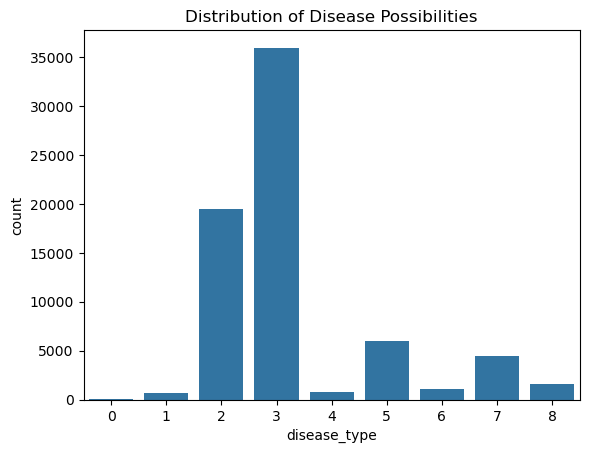

In [51]:
#Countplot
sns.countplot(x='disease_type',data=df)
plt.title('Distribution of Disease Possibilities')
plt.show()

### 5. Selecting features and target, splitting into training and testing sets and feature scaling

In [52]:
#Features and target
x=df.drop(['id','disease_type','date','country','occupation'],axis=1)
y=df['disease_type']

#Split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Feature scaling
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### 6. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_pred)

### 6(a). Displaying Accuracy and Performance Metrics of Logistic Regression Model

In [54]:
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test,logreg_pred))

Logistic Regression Accuracy: 68.35

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.56      0.21      0.30       195
           2       0.61      0.73      0.67      5858
           3       0.71      0.77      0.74     10736
           4       0.64      0.84      0.73       233
           5       0.80      0.71      0.75      1875
           6       0.48      0.28      0.35       350
           7       0.40      0.00      0.00      1292
           8       0.66      0.17      0.27       448

    accuracy                           0.68     21000
   macro avg       0.54      0.41      0.42     21000
weighted avg       0.67      0.68      0.66     21000



### 7. KNN (K-Nearest-Neighbour) Algorithm

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

### 7(a). Display Accuracy and Performance Metrics of KNN Model

In [56]:
print(f'K-Nearest Neighbors Accuracy:{knn_accuracy*100:.2f}')
print('\nK-Nearest Neighbors Classification Report:')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy:58.18

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.32      0.24      0.27       195
           2       0.48      0.67      0.56      5858
           3       0.67      0.68      0.68     10736
           4       0.53      0.48      0.51       233
           5       0.67      0.30      0.41      1875
           6       0.39      0.14      0.21       350
           7       0.15      0.02      0.03      1292
           8       0.51      0.41      0.46       448

    accuracy                           0.58     21000
   macro avg       0.41      0.33      0.35     21000
weighted avg       0.57      0.58      0.56     21000



### 7(b). Plotting Confusion Matrix for KNN Model

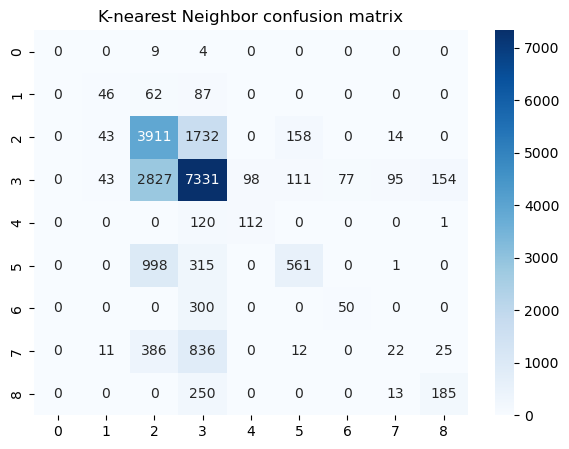

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot =True, fmt='d', cmap='Blues')
plt.title('K-nearest Neighbor confusion matrix')
plt.show()

### 8. Decision trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_pred=decision_tree.predict(x_test)
decision_tree_accuracy=accuracy_score(y_test, decision_tree_pred)

### 8(a). Display Accuracy and Performance Metrics of Decision Tree Model

In [59]:
print(f'Decision tree accuracy: {decision_tree_accuracy*100:.2f}')
print('\nDecision Tree Classification Report:')
print(classification_report(y_test, decision_tree_pred))

Decision tree accuracy: 66.12

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.72      0.69      0.71       195
           2       0.69      0.71      0.70      5858
           3       0.67      0.66      0.67     10736
           4       0.70      0.67      0.68       233
           5       0.84      0.80      0.82      1875
           6       0.34      0.35      0.34       350
           7       0.30      0.32      0.31      1292
           8       0.65      0.67      0.66       448

    accuracy                           0.66     21000
   macro avg       0.62      0.60      0.61     21000
weighted avg       0.66      0.66      0.66     21000



### 8(b). Plotting Confusion Matrix for Decision Tree Model

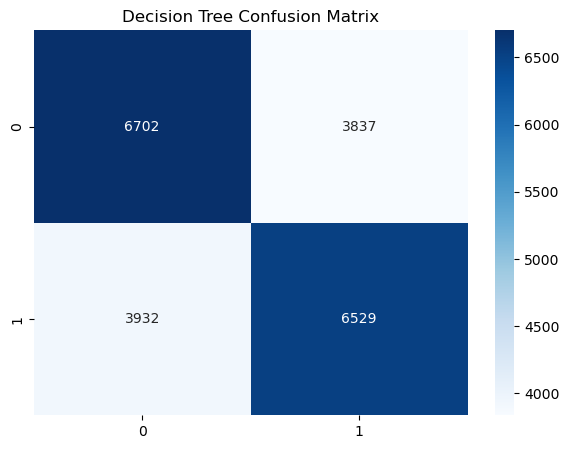

In [58]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### 9. Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
svm_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_test, svm_pred)

### 9(a). Display Accuracy and Performance Metrics of Support Vector Machine Model

In [61]:
print(f'SVM accuracy: {svm_accuracy*100:.2f}')
print('\nSVM Classification Report:')
print(classification_report(y_test, svm_pred))

SVM accuracy: 68.32

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.59      0.15      0.24       195
           2       0.60      0.76      0.67      5858
           3       0.72      0.77      0.75     10736
           4       0.65      0.43      0.52       233
           5       0.81      0.68      0.74      1875
           6       0.67      0.02      0.03       350
           7       1.00      0.00      0.00      1292
           8       0.65      0.46      0.54       448

    accuracy                           0.68     21000
   macro avg       0.63      0.36      0.39     21000
weighted avg       0.71      0.68      0.65     21000



### 9(b). Plotting Confusion Matrix for Support Vector Machine Model

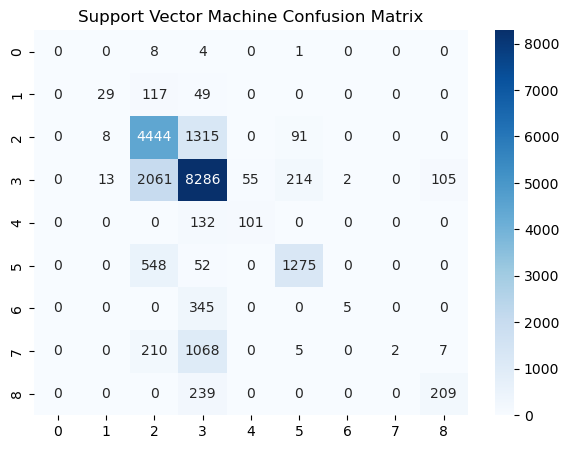

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

### 10. Checking all the model accuracies

In [62]:
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support Vector Machine': svm_accuracy,
}

#Display accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f}%')

Logistic Regression Accuracy: 68.35%
K-Nearest Neighbors Accuracy: 58.18%
Decision Tree Accuracy: 66.12%
Support Vector Machine Accuracy: 68.32%


### 11. Predicitng Disease Type for New User through User Input

In [45]:
# Mapping from label encoder to disease type according to the given database
disease_labels = {
    0: "At Risk (Age, Smoking, Alcohol)",
    1: "Borderline High Cholesterol",
    2: "Borderline Hypertension",
    3: "Cardiovascular Disease",
    4: "Diabetes",
    5: "Healthy/Low Risk",
    6: "High Cholesterol",
    7: "Hypertension",
    8: "Prediabetes"
}

def predict_disease():
    print("Please enter the following details:")
    active = int(input("Active (0/1): "))
    age = int(input("Age (years): "))
    alco = int(input("Alcohol consumption (0/1): "))
    ap_hi = int(input("Systolic BP (ap_hi): "))
    ap_lo = int(input("Diastolic BP (ap_lo): "))
    cholesterol = int(input("Cholesterol (1-normal, 2-above normal, 3-well above normal): "))
    gender = int(input("Gender (1-male, 2-female): "))
    gluc = int(input("Glucose (1-normal, 2-above normal, 3-well above normal): "))
    height = int(input("Height (cm): "))
    smoke = int(input("Smoke (0/1): "))
    weight = int(input("Weight (kg): "))

    # Arrange input as a 2D array
    user_data = np.array([[active, age, alco, ap_hi, ap_lo, cholesterol, gender, gluc, height, smoke, weight]])
    prediction = logreg.predict(user_data)
    disease_type = disease_labels.get(prediction[0], "Unknown Disease Type")
    print(f"According to the entered information, the person is prone/likely to have: {disease_type}")

In [64]:
predict_disease()

Please enter the following details:


Active (0/1):  0
Age (years):  50
Alcohol consumption (0/1):  1
Systolic BP (ap_hi):  140
Diastolic BP (ap_lo):  120
Cholesterol (1-normal, 2-above normal, 3-well above normal):  3
Gender (1-male, 2-female):  2
Glucose (1-normal, 2-above normal, 3-well above normal):  1
Height (cm):  190
Smoke (0/1):  1
Weight (kg):  80


According to the entered information, the person is prone/likely to have: Cardiovascular Disease
